## Introduction

The average height of the sea has increased more steadily over the past century—less than a centimeter annually, but those tiny increases add up. The average sea level today is 5 to 8 inches (13–20 cm) higher than it was in 1900. The water level hadn't altered much during the previous 2,000 years, so this is a significant shift. Over time, the rate of sea level rise has also accelerated. According to studies, the sea level increased by an average of 1.2 to 1.7 millimeters each year between 1900 and 1990. It is anticipated that in 2016, the rate will be 3.4 millimeters per year, up from roughly 3.2 millimeters per year in 2000.

Scientists agree that the current climatic changes are mostly the result of human activities, and climate change is what drives sea level rise. Sea level began to rise in the late 1800s, shortly after mankind began using coal, gas, and other fossil fuels for energy. When these high-energy fuel sources are consumed, carbon dioxide is released into the environment. Carbon dioxide absorbs and stores heat from the sun, warming the atmosphere and the earth.

Sea level rises when the globe warms for two reasons. First, warmer temperatures melt ice on land, such as glaciers and ice sheets, and the meltwater flows into the ocean, raising sea levels. Second, because warm water expands and takes up more space than cold water, the volume of water in the sea increases. The coasts will be the hardest damaged by sea level rise. Land that is now home to between 470 and 760 million coastal dwellers may be swamped by sea level rise associated with a 4 degree Celsius warming if we do not reduce the quantity of carbon dioxide in the atmosphere over the next few centuries.
 
The majority of this population lives in cities. Storms are already becoming more deadly as sea levels rise, producing more flooding and destruction in densely populated regions. And it will have varied effects in different parts of the world, with certain areas being particularly heavily struck.

#### Problem Statement

We will use statistical modeling to create and evaluate a solution that forecasts the possibility of an extreme event occurring within a specific time frame. To arrive at the solution, we will create a generalized framework for this type of modeling that can be used to a variety of datasets. Projects based on this concept will concentrate on real-world datasets of interest.

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from pandas import to_datetime
import numpy as np

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_17952/4175131860.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv('/content/Cambridge, MD.csv')
df = pd.read_csv('/content/Cambridge, MD.csv')
df = pd.read_csv('/content/Cambridge, MD.csv')

In [ ]:
df.head()

,Date,Time (GMT),Highest,MHHW (ft),MHW (ft),MSL (ft),MTL (ft),MLW (ft),MLLW (ft),Lowest (ft),Inf
0,1971/01/01,00:00,NaN,NaN,1.219,0.458,0.469,-0.281,NaN,NaN,6
1,1971/02/01,00:00,2.809,NaN,1.429,0.688,0.699,-0.042,NaN,-1.171,0
2,1971/03/01,00:00,3.409,NaN,1.329,0.608,0.588,-0.151,NaN,-1.732,0
3,1971/04/01,00:00,3.088,NaN,1.628,0.829,0.838,0.048,NaN,-1.162,0
4,1971/05/01,00:00,2.478,NaN,1.759,0.958,0.958,0.148,NaN,-0.662,0


In [3]:
df_highest = df[['Date','Highest']][0:200]
df_highest.columns = ['ds', 'y']

In [ ]:
df_highest.describe()

,y
count,192.000000
mean,2.932854
std,0.449552
min,1.889000
25%,2.638500
50%,2.898000
75%,3.203000
max,4.518000


In [ ]:
df_highest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      200 non-null    object 
 1   y       192 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [4]:
df_highest = df_highest.dropna()

In [5]:
# convert the 'Date' column to datetime format
df_highest['ds']= pd.to_datetime(df_highest['ds'])

## Visualizing a time series

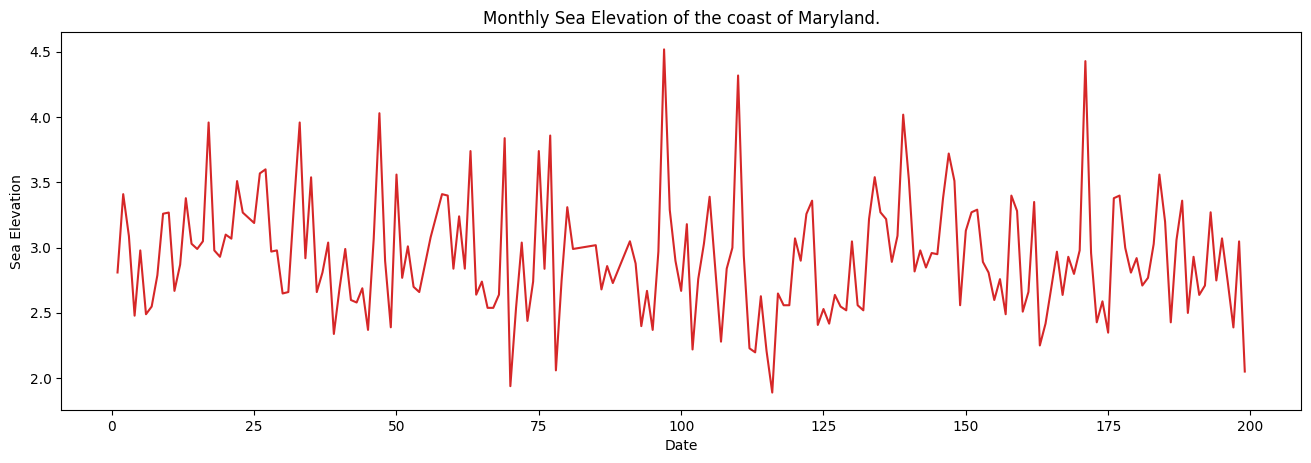

In [6]:
# Draw Plot
def plot_df(df_highest, x, y, title="", xlabel='Date', ylabel='Sea Elevation', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_highest, x=df_highest.index, y=df_highest.y, title='Monthly Sea Elevation of the coast of Maryland.')

Since all values are positive, you can show this on both sides of the Y axis to emphasize the rise in sea elevation.

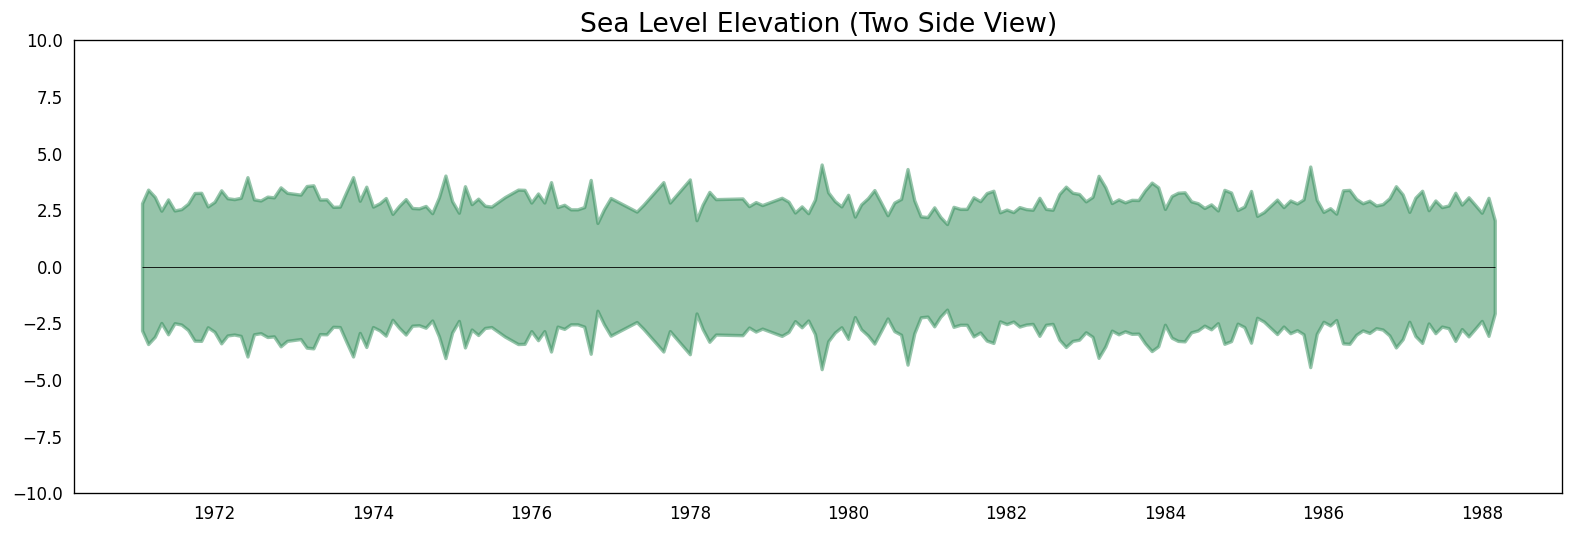

In [ ]:
x = df_highest['ds'].values
y1 = df_highest['y'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-10, 10)
plt.title('Sea Level Elevation (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_highest.ds), xmax=np.max(df_highest.ds), linewidth=.5)
plt.show()

Since its a monthly time series and follows a certain repetitive pattern every year, we can plot each year as a separate line in the same plot. This lets us compare the year wise patterns side-by-side.

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()

  app.launch_new_instance()



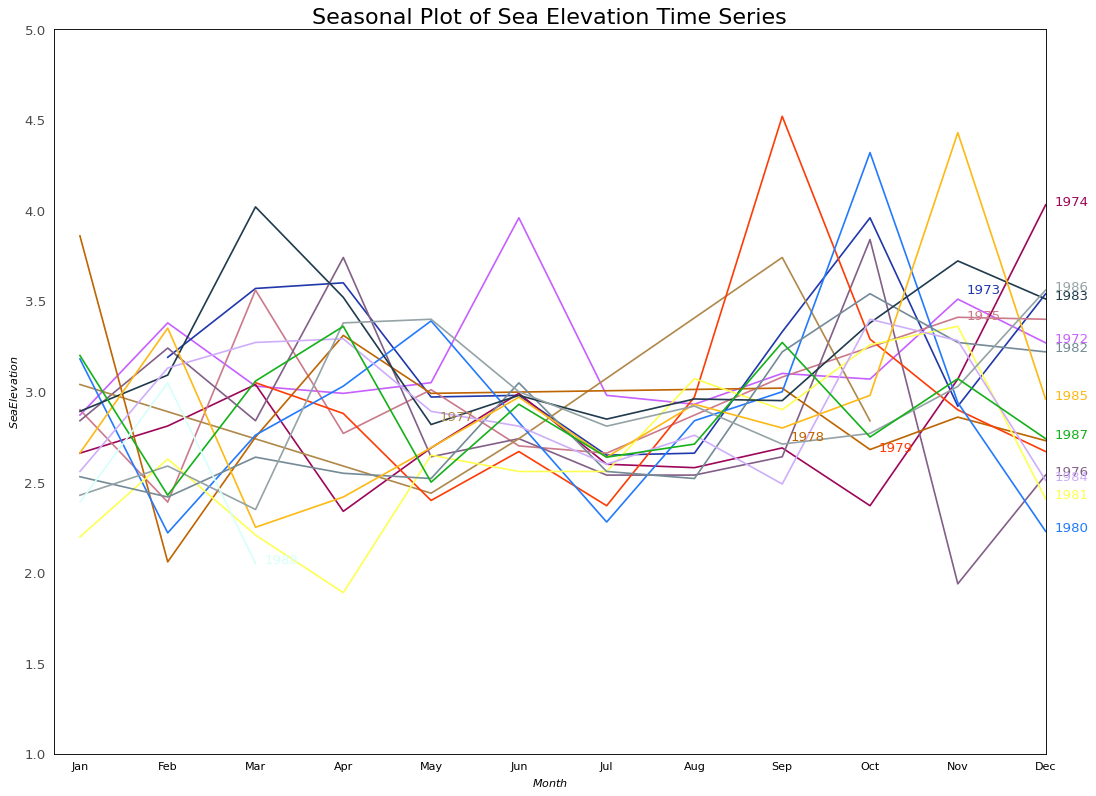

In [ ]:
import matplotlib as mpl

# Prepare data
df_highest['year'] = [d.year for d in df_highest.ds]
df_highest['month'] = [d.strftime('%b') for d in df_highest.ds]
years = df_highest['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'y', data=df_highest.loc[df_highest.year==y, :], color=mycolors[i], label=y)
        plt.text(df_highest.loc[df_highest.year==y, :].shape[0]-.9, df_highest.loc[df_highest.year==y, 'y'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(1, 5), ylabel='$Sea Elevation$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Sea Elevation Time Series", fontsize=20)
plt.show()

#### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

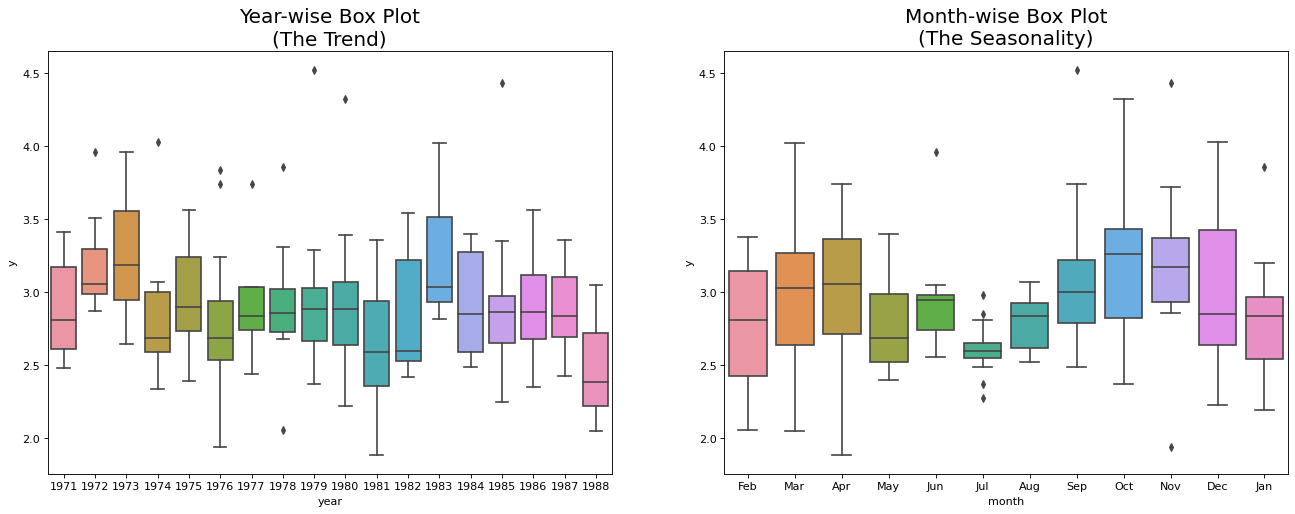

In [7]:

import seaborn as sns

# Prepare data
df_highest['year'] = [d.year for d in df_highest.ds]
df_highest['month'] = [d.strftime('%b') for d in df_highest.ds]
years = df_highest['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='y', data=df_highest, ax=axes[0])
sns.boxplot(x='month', y='y', data=df_highest.loc[~df_highest.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of October and April clearly has higher Sea Elevation, which could be attributed to extreme events.

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?

### Patterns in a time series

Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

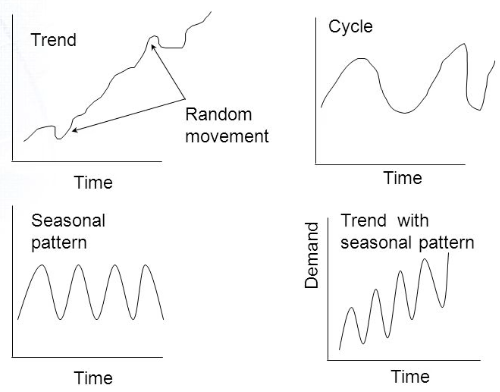

### Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

*Additive time series*:
Value = Base Level + Trend + Seasonality + Error

*Multiplicative Time Series*:
Value = Base Level x Trend x Seasonality x Error

### How to decompose a time series into its components?

You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

# df_highest_1 = df_highest[['ds', 'y']].copy()
# df_highest_1.set_index('ds', inplace=True)

# # Multiplicative Decomposition 
# result_mul = seasonal_decompose(df_highest_1['y'], model='multiplicative', extrapolate_trend='freq')

# # Additive Decomposition
# result_add = seasonal_decompose(df_highest_1['y'], model='additive', extrapolate_trend='freq')

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

### Stationary and Non-Stationary Time Series

Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

A stationary time series id devoid of seasonal effects as well.

Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

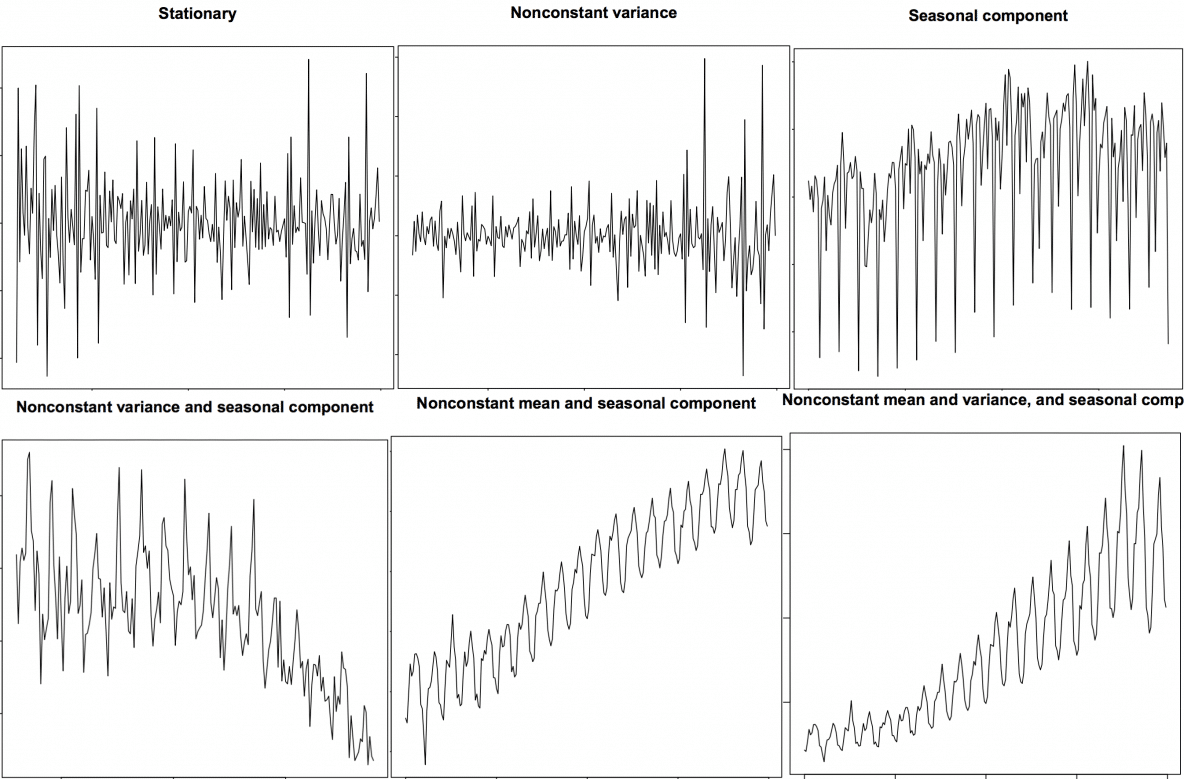

### How to make a time series stationary?

We can make series stationary by:

- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above

The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.

### Why make a non-stationary series stationary before forecasting?

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

### How to test for stationarity?

This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

- Augmented Dickey Fuller test (ADH Test)
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
- Philips Perron test (PP Test)

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

The KPSS test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test. The below code implements these two tests using statsmodels package in python.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_highest.y.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_highest.y.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

  warnings.warn(msg, FutureWarning)

look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning



ADF Statistic: -11.549214557962262
p-value: 3.4804268992886654e-21
Critial Values:
   1%, -3.465058702600837
Critial Values:
   5%, -2.8767942675230356
Critial Values:
   10%, -2.5749014492475535

KPSS Statistic: 0.150382
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

Text(0.5, 1.0, 'Sea Elevation detrended by subtracting the least squares fit')

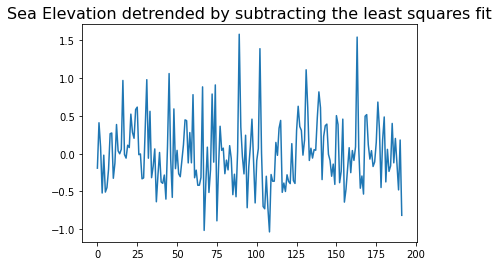

In [8]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(df_highest.y.values)
plt.plot(detrended)
plt.title('Sea Elevation detrended by subtracting the least squares fit', fontsize=16)

### What is the difference between white noise and a stationary series?

Like a stationary series, the white noise is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

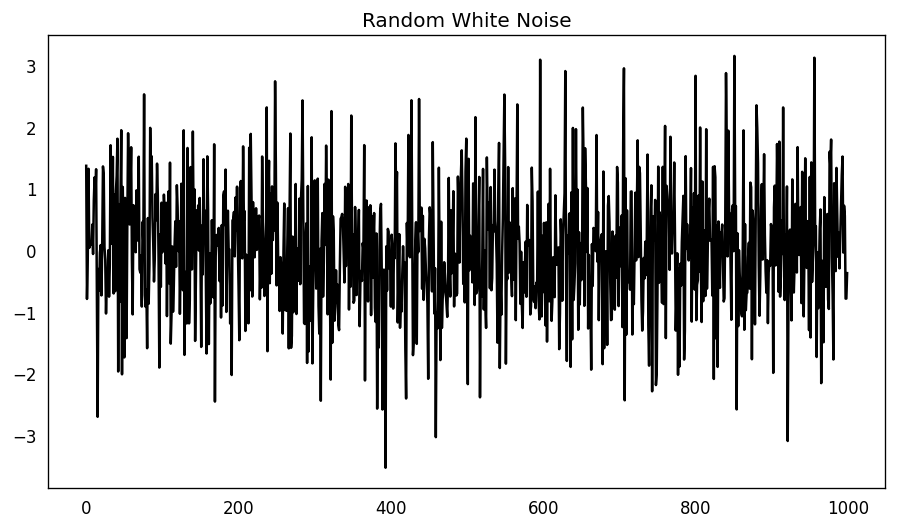

In [ ]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

### How to detrend a time series?

Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

Text(0.5, 1.0, 'Sea Elevation detrended by subtracting the least squares fit')

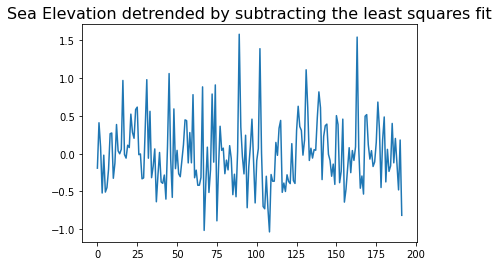

In [9]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(df_highest.y.values)
plt.plot(detrended)
plt.title('Sea Elevation detrended by subtracting the least squares fit', fontsize=16)

In [ ]:
# # Using statmodels: Subtracting the Trend Component.
# from statsmodels.tsa.seasonal import seasonal_decompose

# df_highest_2 = df_highest[['ds','y']].copy()
# df_highest_2.set_index('ds', inplace=True)

# result_mul = seasonal_decompose(df_highest_2['y'], model='multiplicative', extrapolate_trend='freq')
# detrended = df_highest_2.y.values - result_mul.trend
# plt.plot(detrended)
# plt.title('Sea Elevation detrended by subtracting the trend component', fontsize=16)

#### How to test for seasonality of a time series?

The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

- Hour of day
- Day of month
- Weekly
- Monthly
- Yearly


However, if we want a more definitive inspection of the seasonality, we can use the Autocorrelation Function (ACF) plot. But when there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

#### What is autocorrelation and partial autocorrelation functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

Stationarity means that the time series does not have a trend, has a constant variance, a constant autocorrelation pattern, and no seasonal pattern. The autocorrelation function declines to near zero rapidly for a stationary time series. In contrast, the ACF drops slowly for a non-stationary time series.

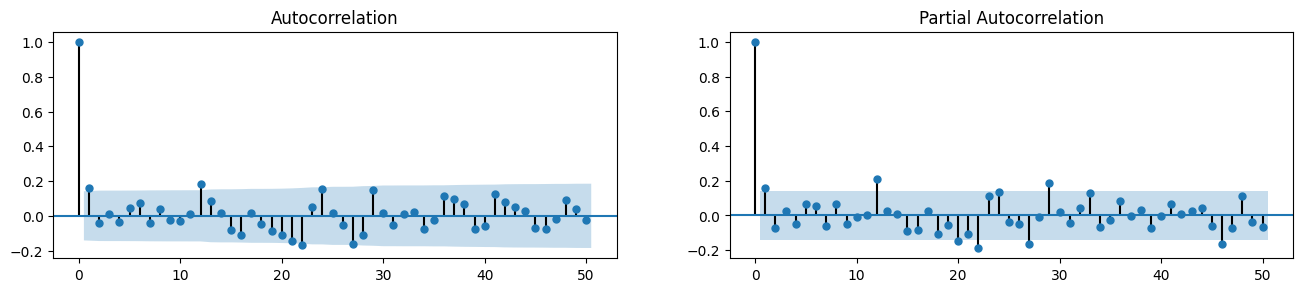

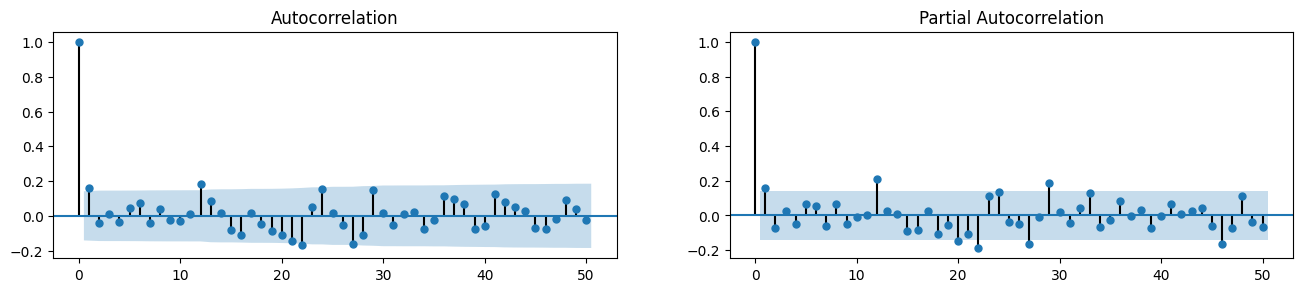

In [19]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_highest.y.tolist(), lags=50, ax=axes[0])
plot_pacf(df_highest.y.tolist(), lags=50, ax=axes[1])

#### How to treat missing values in a time series? (to be completed)

Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value.

However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:


- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal couterparts


#### Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise. 

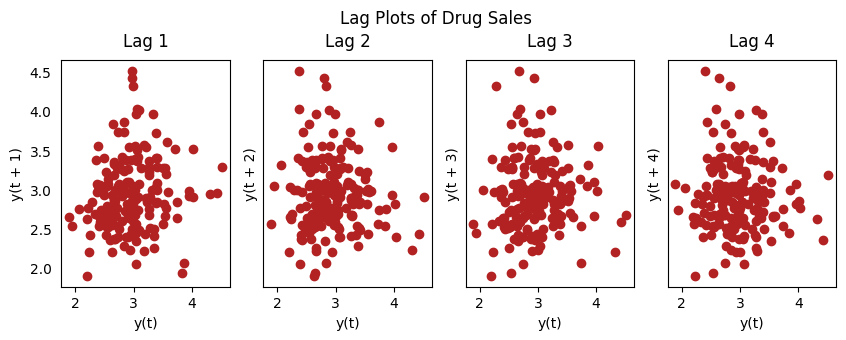

In [30]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_highest.y, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

# fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
# for i, ax in enumerate(axes.flatten()[:4]):
#     lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
#     ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

This lag plot above exhibits a vertical pattern. This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate.

#### How to estimate the forecastability of a time series? (to be completed)

The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

The higher the approximate entropy, the more difficult it is to forecast it.

Another better alternate is the ‘Sample Entropy’.

Sample Entropy is similar to approximate entropy but is more consistent in estimating the complexity even for smaller time series. For example, a random time series with fewer data points can have a lower ‘approximate entropy’ than a more ‘regular’ time series, whereas, a longer random time series will have a higher ‘approximate entropy’.

### Why and How to smoothen a time series?

Smoothening of a time series may be useful in:

- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better

Let's look at the following methods:

- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)

Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

LOESS, short for ‘LOcalized regrESSion’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

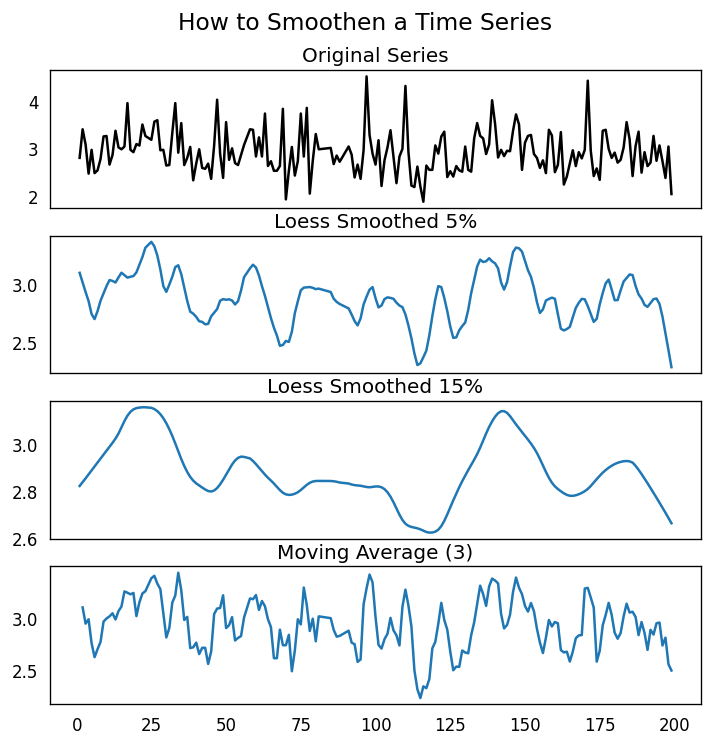

In [31]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = df_highest.copy()

# 1. Moving Average
df_ma = df_orig.y.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.y, np.arange(len(df_orig.y)), frac=0.05)[:, 1], index=df_orig.index, columns=['y'])
df_loess_15 = pd.DataFrame(lowess(df_orig.y, np.arange(len(df_orig.y)), frac=0.15)[:, 1], index=df_orig.index, columns=['y'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['y'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['y'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['y'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()


### How to use Granger Causality test to know if one time series is helpful in forecasting another? (to be completed)

Granger causality test is used to determine if one time series will be useful to forecast another.

## Prophet 

In [ ]:
!pip install prophet

In [32]:
from prophet import Prophet 

### Forecast Sea Level With Prophet

In order to forecast we first need to create a dataframe that will save our predictions. Method make_future_dataframe builds a dataframe that extends into the future a specified number of days. In our case, we will predict 90 days into the future.

In [33]:
model = Prophet(seasonality_mode='multiplicative',interval_width=0.95)
model.fit(df_highest)
future = model.make_future_dataframe(periods=12 * 5, freq='MS')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1aez01rw/k54ghc5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1aez01rw/suw_u5jj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63870', 'data', 'file=/tmp/tmp1aez01rw/k54ghc5f.json', 'init=/tmp/tmp1aez01rw/suw_u5jj.json', 'output', 'file=/tmp/tmp6pbh9jwo/prophet_model-20220909110157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:01:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


To make predictions we apply method predict on the future dataframe that we have just generated.

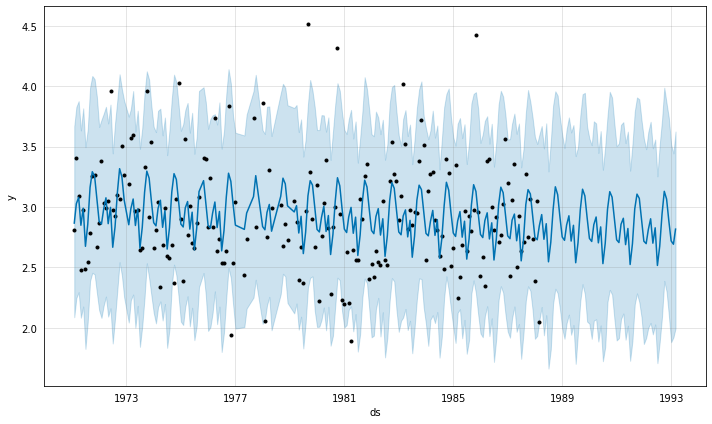

In [34]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

In the forecast plot above, deep blue line is forecast sea level forecast[‘y_hat’], black dots are actual sea level forecast[‘y’]. The light blue shade is 95% confidence interval around the forecast. The uncertainty interval in this region is bounded by forecast[‘yhat_lower’] and forecast[‘yhat_upper’] values.

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1971-02-01,3.003291,2.063762,3.622685,3.003291,3.003291,-0.045488,-0.045488,-0.045488,-0.045488,-0.045488,-0.045488,0.0,0.0,0.0,2.866677
1,1971-03-01,3.002643,2.220790,3.779235,3.002643,3.002643,0.008171,0.008171,0.008171,0.008171,0.008171,0.008171,0.0,0.0,0.0,3.027178
2,1971-04-01,3.001926,2.280057,3.975862,3.001926,3.001926,0.025986,0.025986,0.025986,0.025986,0.025986,0.025986,0.0,0.0,0.0,3.079933
3,1971-05-01,3.001233,2.075142,3.693225,3.001233,3.001233,-0.050813,-0.050813,-0.050813,-0.050813,-0.050813,-0.050813,0.0,0.0,0.0,2.848731
4,1971-06-01,3.000516,2.170525,3.751148,3.000516,3.000516,-0.003341,-0.003341,-0.003341,-0.003341,-0.003341,-0.003341,0.0,0.0,0.0,2.990491


The forecast dataframe contains Prophet’s prediction for sales. Because we’ve also passed historical dates, it provides an in-sample fit that we can use to evaluate our model.

As you can see, forecast includes a column yhat with the forecast, as well as columns for components and uncertainty intervals

### Trend Changepoints

Real life time series such as this one, frequently have abrupt changes in their trajectories. These changepoints sign abrupt changes in the time series caused, for instances, extreme events, unforeseen calamity. Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. At these points, the growth rate is allowed to change making the model more flexible. This may cause overfitting or underfitting.

A parameter called changepoint_prior_scale could be used to adjust the trend flexibility and tackle overfitting and underfitting. Higher value fits a more flexible curve to the time series.

By default changepoints are only inferred for the first 80% of the time series, but you can change it by making use of the changepoint_range argument of the model.

It is also possible to add your own changepoints manually, using the changepoints argument.

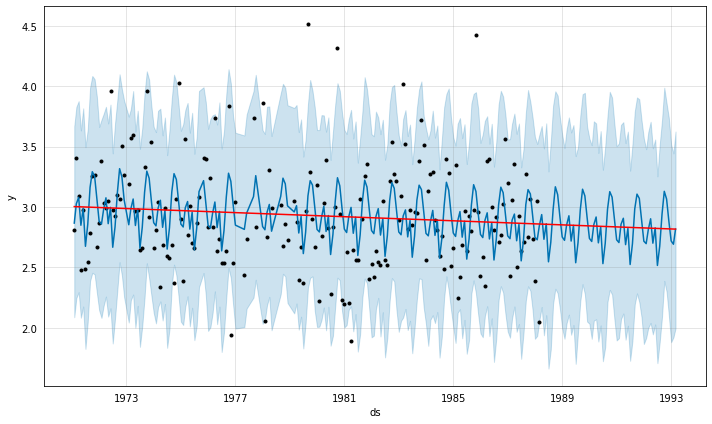

In [35]:
from prophet.plot import add_changepoints_to_plot

plot1 = model.plot(forecast)

a = add_changepoints_to_plot(plot1.gca(), model, forecast)

#### Component Plots

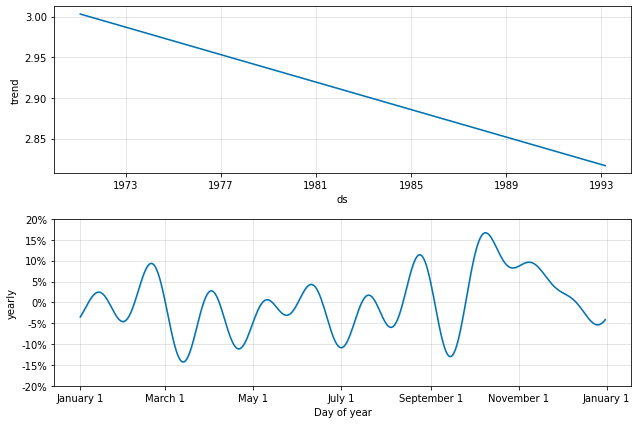

In [ ]:
plot2 = model.plot_components(forecast)

We can observe the following on the forecast components plotted above:

**Trend component**: Trend upwards. 

**Yearly seasonality component**: We can observe a continuous uptrend from 2009 and onwards. This suggests lot of extreme events have occurred in the 2000s. 

### Evaluate model

How this model is performing?

The forecast dataframe includes predictions made on the training data dates. Therefore, we can use this in-sample fit to evaluate our model.

In [37]:
df_merge = pd.merge(df_highest, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,1971-02-01,2.087295,3.668037,2.866677,2.809
1,1971-03-01,2.245913,3.827721,3.027178,3.409
2,1971-04-01,2.294429,3.876014,3.079933,3.088
3,1971-05-01,2.083196,3.633775,2.848731,2.478
4,1971-06-01,2.175990,3.816891,2.990491,2.978


To evaluate this model we will be using MAE and MAPE

In [38]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [39]:
# calculate MAE between observed and predicted values 
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)

In [40]:
print(mae_01, mape_01)

0.3096558573536783 0.10743382224635267


A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. 

#### LSTM

In [ ]:
!pip install scalecast --upgrade

In [43]:
from scalecast.Forecaster import Forecaster

In [44]:
f = Forecaster(y=df_highest['y'], current_dates=df_highest['ds'])

In [45]:
df_highest_lstm = df_highest.copy()
df_highest_lstm.set_index("ds", inplace = True)

In [46]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [47]:
print(stat)
print(pval)

-11.549214557962262
3.4804268992886654e-21


#### LSTM Forecasting
To model anything in scalecast, we need to complete the following three basic steps:

1. *Specify a test length* --  all models are tested in scalecast with the same slice of data and at least one data point must be set aside to do so. There is no getting around this. The test length is a discrete number of the last observations in the full time series. You can pass a percentage of a discrete number to the set_test_length function.

2. *Generate future dates* -- all models in scalecast produce a forecast in the same scale as the observed data. There is no getting around this. The number of dates you generate in this step will determine how long all models will be forecast out.

3. *Choose an estimator* -- we will be using the “lstm” estimator, but there are a handful of others available.


In [48]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

Now, to call an LSTM forecast. By default, this model will be run with a single input layer of 8 size, Adam optimizer, tanh activation, a single lagged dependent-variable value to train with, a learning rate of 0.001, and no dropout. All data is scaled going into the model with a min-max scaler and un-scaled coming out. Anything you can pass to the fit() method in TensorFlow, you can also pass to the scalecast manual_forecast() method.

6/6 [==============================] - 2s 4ms/step - loss: 0.3974


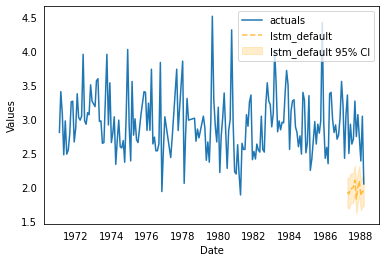

In [49]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

Predictably, this model did not perform well. But just the fact we were able to obtain results that easily is a huge start. Fine-tuning it to produce something useful should not be too difficult.

Let’s start simple and just give it more lags to predict with. We saw a significant autocorrelation of 24 months in the PACF, so let’s use that:

5/5 [==============================] - 3s 12ms/step - loss: 0.3681


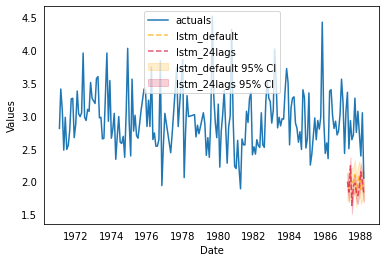

In [50]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Already, we see some noticeable improvements, but this is still not even close to ready. An obvious next step might be to give it more time to train. In this universe, more time means more epochs. Let’s see where five epochs gets us. We also validate the model while it’s training by specifying validation_split=.2 below:

Epoch 1/5
4/4 [==============================] - 4s 523ms/step - loss: 0.3929 - val_loss: 0.3951
Epoch 2/5
4/4 [==============================] - 0s 20ms/step - loss: 0.3775 - val_loss: 0.3785
Epoch 3/5
4/4 [==============================] - 0s 20ms/step - loss: 0.3622 - val_loss: 0.3620
Epoch 4/5
4/4 [==============================] - 0s 21ms/step - loss: 0.3469 - val_loss: 0.3456
Epoch 5/5
4/4 [==============================] - 0s 21ms/step - loss: 0.3317 - val_loss: 0.3289
Epoch 1/5
4/4 [==============================] - 3s 226ms/step - loss: 0.3594 - val_loss: 0.3624
Epoch 2/5
4/4 [==============================] - 0s 20ms/step - loss: 0.3485 - val_loss: 0.3496
Epoch 3/5
4/4 [==============================] - 0s 18ms/step - loss: 0.3367 - val_loss: 0.3364
Epoch 4/5
4/4 [==============================] - 0s 24ms/step - loss: 0.3253 - val_loss: 0.3234
Epoch 5/5
4/4 [==============================] - 0s 20ms/step - loss: 0.3138 - val_loss: 0.3102


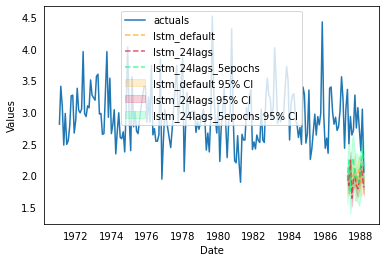

In [51]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Again, closer. A couple values even fall within the 95% confidence interval this time. Next, let’s try increasing the number of layers in the network to 3, increasing epochs to 25, but monitoring the validation loss value and telling the model to quit after more than 5 iterations in which that doesn’t improve. This is known as early stopping.

In [ ]:
!pip install tensorflow

Epoch 1/25
4/4 [==============================] - 20s 1s/step - loss: 0.3679 - val_loss: 0.3491
Epoch 2/25
4/4 [==============================] - 0s 73ms/step - loss: 0.3273 - val_loss: 0.2971
Epoch 3/25
4/4 [==============================] - 0s 110ms/step - loss: 0.2844 - val_loss: 0.2597
Epoch 4/25
4/4 [==============================] - 0s 81ms/step - loss: 0.2590 - val_loss: 0.2523
Epoch 5/25
4/4 [==============================] - 0s 80ms/step - loss: 0.2504 - val_loss: 0.2361
Epoch 6/25
4/4 [==============================] - 0s 87ms/step - loss: 0.2311 - val_loss: 0.2131
Epoch 7/25
4/4 [==============================] - 0s 91ms/step - loss: 0.2161 - val_loss: 0.2005
Epoch 8/25
4/4 [==============================] - 0s 88ms/step - loss: 0.2059 - val_loss: 0.1880
Epoch 9/25
4/4 [==============================] - 1s 132ms/step - loss: 0.1937 - val_loss: 0.1757
Epoch 10/25
4/4 [==============================] - 0s 117ms/step - loss: 0.1824 - val_loss: 0.1653
Epoch 11/25
4/4 [==========

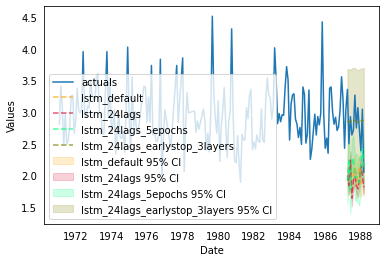

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

In [ ]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [ ]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm_best,0.106571,0.353657,0.029218,True
1,lstm_24lags_earlystop_3layers,0.118702,0.371598,-0.071776,False
2,lstm_24lags_5epochs,0.267270,0.876211,-4.959028,False
3,lstm_default,0.289578,0.912594,-5.464180,False
4,lstm_24lags,0.319298,0.997817,-6.727873,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
df_lstm = pd.read_csv('/content/Cambridge, MD.csv')
df_lstm["Date"] = pd.to_datetime(df_lstm["Date"])


df_lstm = df_lstm[["Date", "Highest"]]
# florida = florida["Avg_Temp"].resample('MS').mean()
df_lstm = df_lstm.fillna(df_lstm.bfill())
df_lstm.columns = ['Date', 'Highest']

train = df_lstm[:-225]
len(train)
test = df_lstm[-225:]
len(test)
train_dates = pd.to_datetime(train['Date'])
test_dates  = pd.to_datetime(test['Date'])
  

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train['Highest'].values.reshape(-1,1))

prediction_days = 225

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

After scaling all the values in the data set between 0 and 1, I specify the number of months to predict. After this value, we separate the data as x_train and y_train. With the value of 225 we have given, the model will work in such a way that it examines 225 data and predicts the next one, then examines 225 data again and tries to predict the next one.

After filling our lists, we convert them to NumPy arrays. then we reshape x_train so that x_train can work with the neural network.

In [ ]:
model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

We have to give the input_shape value to our first LSTM layer, because our model does not know the size of the data it will process, we do not need to enter this value in the next steps. In the last step, we returned a single value with the Dense layer, so this estimated value will be the average temperature predicted by our model.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 225, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 225, 128)          0         
                                                                 
 lstm_21 (LSTM)              (None, 225, 128)          131584    
                                                                 
 dropout_1 (Dropout)         (None, 225, 128)          0         
                                                                 
 lstm_22 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 1)               

Then we compile our model, we prepare the test data set that our model will see with the completed model. Finally, we reshape x_test and bring it to the appropriate format for our model.

In [ ]:
actual_elevation = test['Highest'].values
total_elevation = pd.concat((train['Highest'], test['Highest']),axis=0)

model_inputs = total_elevation[len(total_elevation)-len(test)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


# Make Predictions on Test Data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

Then we perform a predict operation on our model. Then we normalize these estimated values with the inverse_transform operation in order to compare these predicted values with the actual values we have.

In [ ]:
mean_absolute_error(test['Highest'], pred)

0.39735653450012204

### ARIMA

A popular and widely used statistical method for time series forecasting is the ARIMA model. Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting and provide complementary approaches to the problem. While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

#### Stationarity

A stationary time series data is one whose properties do not depend on the time, That is why time series with trends, or with seasonality, are not stationary. the trend and seasonality will affect the value of the time series at different times, On the other hand for stationarity it does not matter when you observe it, it should look much the same at any point in time. In general, a stationary time series will have no predictable patterns in the long-term.

ARIMA is an acronym that stands for Auto-Regressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of difference.
- q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.


In [ ]:
df_highest

,ds,y,year,month
1,1971-02-01,2.809,1971,Feb
2,1971-03-01,3.409,1971,Mar
3,1971-04-01,3.088,1971,Apr
4,1971-05-01,2.478,1971,May
5,1971-06-01,2.978,1971,Jun
...,...,...,...,...
195,1987-11-01,3.070,1987,Nov
196,1987-12-01,2.739,1987,Dec
197,1988-01-01,2.388,1988,Jan
198,1988-02-01,3.047,1988,Feb


In [ ]:
df_ARIMA = df_highest.copy()
df_ARIMA = df_ARIMA[['month', 'y']]

df_ARIMA.columns=["Month","Sea Elevation"]
df_ARIMA.set_index('Month',inplace=True)

In [ ]:
df_ARIMA.shape

(192, 1)

For ARIMA first thing we do is identify if the data is stationary or non – stationary. if data is non-stationary we will try to make them stationary then we will process further.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df_ARIMA['Sea Elevation'])

To identify the nature of data, we will be using the null hypothesis.

- H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

- H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

- #Ho: It is non-stationary
- #H1: It is stationary

We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

In [ ]:
def adfuller_test(Sea_level):
    result=adfuller(Sea_level)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:

        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df_ARIMA['Sea Elevation'])

ADF Test Statistic : -11.549214557962262
p-value : 3.4804268992886654e-21
#Lags Used : 0
Number of Observations : 191
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Here P-value is 1.16 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

Let’s try to see the first difference and seasonal difference:

In [ ]:
df_ARIMA['Elevation First Difference'] = df_ARIMA['Sea Elevation'] - df_ARIMA['Sea Elevation'].shift(1)
df_ARIMA['Seasonal First Difference']=df_ARIMA['Sea Elevation']-df_ARIMA['Sea Elevation'].shift(12)
df_ARIMA.head()

,Sea Elevation,Elevation First Difference,Seasonal First Difference
Month,,,
Feb,2.809,NaN,NaN
Mar,3.409,0.600,NaN
Apr,3.088,-0.321,NaN
May,2.478,-0.610,NaN
Jun,2.978,0.500,NaN


In [ ]:
# Again testing if data is stationary
adfuller_test(df_ARIMA['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.478675983345259
p-value : 2.310585661285463e-06
#Lags Used : 11
Number of Observations : 168
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


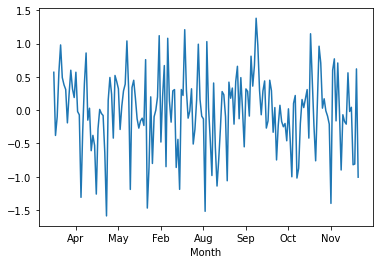

In [ ]:
df_ARIMA['Seasonal First Difference'].plot()

## Extreme Value Analysis



Extreme value theory (EVT) is a branch of statistics concerned with the extreme deviations from the median of probability distributions. It attempts to estimate the likelihood of events that are more extreme than any previously recorded from a given ordered sample of a given random variable. Many disciplines, including structural engineering, finance, earth sciences, traffic prediction, and geological engineering, use extreme value analysis. In the subject of hydrology, for example, EVA might be used to assess the likelihood of an unusually significant flooding event, such as the 100-year flood. Similarly, a coastal engineer would estimate the 50-year wave and construct the structure accordingly when designing a breakwater.

Typically, one of the three procedures listed below is used to determine SWL return values:

- Extreme value analysis of the SWLs
- Estimation of extreme water levels based on the convolution of the (synchronous) surge's extreme value distribution (or the skew surge, a non-synchronous discrepancy between SWL and tide) with the empirical distribution of tidal levels.
In comparison to 1, this is expected to make greater use of sparse data by permitting the use of complete tidal information that is available.
- Estimation of extreme surge levels based on extreme weather conditions (winds and atmospheric pressures) and computation of pessimistic or conservative SWL estimations by incorporating the Highest Astronomical Tide.

For practical extreme value analysis, there are two main methodologies.

As a first step, the first method focuses on deriving block maxima (minima) series. It is common and useful in many cases to extract the annual maxima (minima), resulting in a "Annual Maxima Series." The second method is based on extracting the peak values attained for any period in which values above a given threshold from a continuous record. This method is commonly known as the "Peak Over Threshold" method.

For AMS data, the analysis may rely in part on the Fisher-Tippett-Gnedenko theorem results, resulting in the generalized extreme value distribution being chosen for fitting. In practice, however, multiple approaches are used to choose from a broader range of distributions. The limiting distributions for the minimum or maximum of a very large collection of independent random variables from the same distribution are discussed in this theorem.

In [54]:
!pip install pyextremes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.9 MB/s 
     |████████████████████████████████| 46 kB 3.0 MB/s 


In [55]:
from pyextremes import EVA, __version__
print("pyextremes", __version__)

pyextremes 2.0.0


`EVA` is a class which provides interface to the most important features of the `pyxtremes` library. It allows to perform all key tasks comprising the Extreme Value Analysis, such as:
- extraction of extreme values using either Block Maxima (`BM`) or Peaks-over-Threshold (`POT`) methods
- fitting a model to the extracted extreme values using either Maximum Likelihood Estimate (`MLE`, built as a wrapper around [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) distributions) or Markov Chain Monte Carlo (MCMC, called `Emcee` as it's built around the [emcee](https://emcee.readthedocs.io/en/stable/) library by Dan Foreman-Mackey)
- inference of extreme values associated with given return periods (exceedance probabilities) using the selected model and graphical visualization of results

In [59]:
df_new_MD_selection = df_highest[['ds','y']].set_index('ds')

series = df_new_MD_selection['y'].squeeze()


In [60]:
model = EVA(data=series)
model

  if not data.index.is_all_dates:



                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                             y      Size:                                 192
Start:                      February 1971      End:                           March 1988
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

### Extract extreme values

Extreme value extraction, the first part of the analysis, can be started once the EVA object has been initialized. The Block Maxima (BM) extraction method with a block size of one year will be used in this lesson. According to the model's architecture, this means that the data is divided into one-year blocks, and the highest value within each block is found and added to the extremes series. Let's use this approach to obtain the extreme values:

In [61]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size="365.2425D",
    errors="coerce",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                             y      Size:                                 192
Start:                      February 1971      End:                           March 1988
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 18      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

Plotting the extracted extreme values against the original time series is an excellent method to evaluate them visually. The plot extremes technique can be used for this. Block boundaries are displayed in the Block Maxima extraction method case.

(<Figure size 768x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff1fbbaf910>)

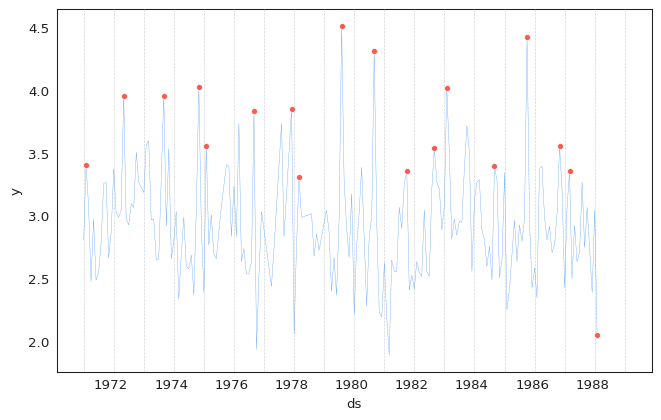

In [62]:
model.plot_extremes()

### Fit a model

The investigation then moves on to fitting a model to the extreme values that were extracted. There are two fitting models: MLE (maximum likelihood) and Emcee. The MLE model by default is employed in this tutorial. It's a straightforward model that uses bootstrap Monte Carlo to determine a point estimate of the distribution parameters and compute confidence intervals. A model has two essential parameters: model, which must be a model name, and distribution, which must be a distribution name that complies with the distribution names in scipy.stats. By default, the model uses the Akaike Information Criterion to determine the optimum distribution. This decision is made between the GEV (Generalized Extreme Value) and Gumbel distributions for Block Maxima.

In [63]:
model.fit_model()
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                             y      Size:                                 192
Start:                      February 1971      End:                           March 1988
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 18      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

Using the plot diagnostic method provides a simple technique to assess the model's quality. The two-by-two plot produced by this method displays return values, PDFs, Q-Q plots, and P-P plots. Let's map it out:

  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)

  -pex2+logpex2-logex2)

  -pex2+logpex2-logex2)

  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)

  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)



(<Figure size 768x768 with 4 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7ff18e0befd0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7ff18dff4250>))

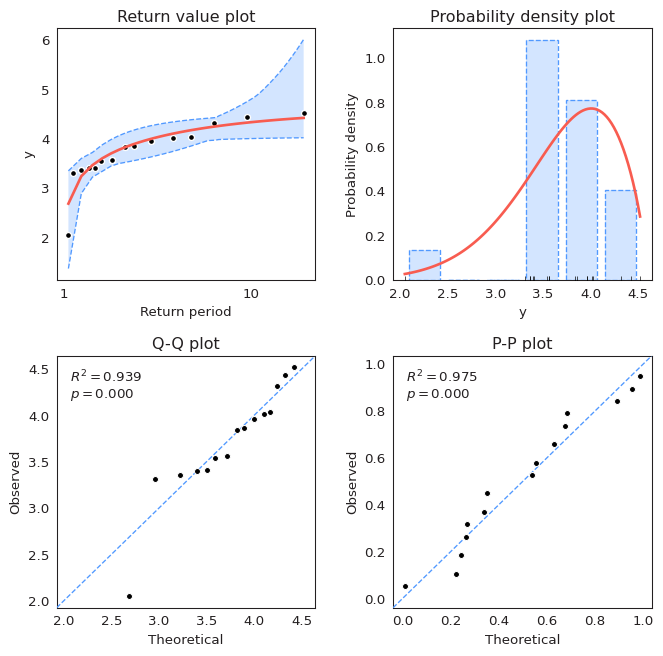

In [64]:
model.plot_diagnostic(alpha=0.95)

### Get output

We are prepared to create a return value plot and obtain a summary of the anticipated extreme return values now that the extreme values have been recovered and a model has been fitted to the data. What about this?

(<Figure size 768x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff188ef0850>)

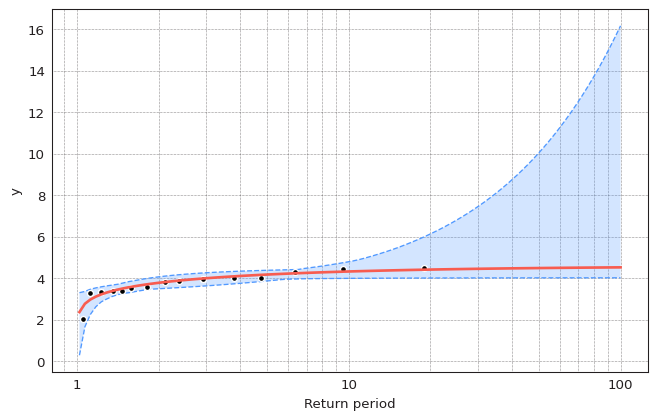

In [65]:
model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

### Reference 

1. https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

2. https://medium.com/analytics-vidhya/3   
3. https://www.machinelearningplus.com/time-series/time-series-analysis-python/
4. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
5. https://analyticsindiamag.com/tutorial-on-univariate-single-step-style-lstm-in-time-series-forecasting/